# Unemployment Analysis with Python during COVID-19

#### Importing Libraries

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#### Loading Data

In [352]:
df=pd.read_csv("Unemployment in India.csv")

In [353]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [354]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

#### Renaming Columns

In [355]:
df.columns=['Region','Date','Frequency','Est_Unemployed','Est_Employed','Est_Labour_Partp','Area']

In [356]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Est_Unemployed', 'Est_Employed',
       'Est_Labour_Partp', 'Area'],
      dtype='object')

In [357]:
df.shape

(768, 7)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            740 non-null    object 
 1   Date              740 non-null    object 
 2   Frequency         740 non-null    object 
 3   Est_Unemployed    740 non-null    float64
 4   Est_Employed      740 non-null    float64
 5   Est_Labour_Partp  740 non-null    float64
 6   Area              740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


#### Converting date to datetime type 

In [360]:
df['Date'] = pd.to_datetime(df['Date'])

In [361]:
df.isnull().sum()

Region              28
Date                28
Frequency           28
Est_Unemployed      28
Est_Employed        28
Est_Labour_Partp    28
Area                28
dtype: int64

#### Scaling all the numeric values using min-max scalar

In [362]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame and contains object columns along with numeric columns
columns_to_scale = ['Est_Unemployed', 'Est_Employed', 'Est_Labour_Partp']
data_to_scale = df[columns_to_scale]  # Select only the numeric columns to scale

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the selected numeric columns
scaled_data = scaler.fit_transform(data_to_scale)

# Convert the scaled data to a DataFrame and assign back to the original DataFrame
df[columns_to_scale] = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Now, df has scaled values in the specified columns, and the other object columns remain unchanged
print(df.head())


           Region       Date Frequency  Est_Unemployed  Est_Employed  \
0  Andhra Pradesh 2019-05-31   Monthly        0.047563      0.261321   
1  Andhra Pradesh 2019-06-30   Monthly        0.039745      0.256002   
2  Andhra Pradesh 2019-07-31   Monthly        0.048866      0.263236   
3  Andhra Pradesh 2019-08-31   Monthly        0.043263      0.267588   
4  Andhra Pradesh 2019-09-30   Monthly        0.067370      0.266955   

   Est_Labour_Partp   Area  
0          0.504895  Rural  
1          0.484808  Rural  
2          0.509284  Rural  
3          0.517218  Rural  
4          0.529203  Rural  


#### Droping all null values

In [363]:
df.dropna(inplace=True)

In [364]:
df.isnull().sum()

Region              0
Date                0
Frequency           0
Est_Unemployed      0
Est_Employed        0
Est_Labour_Partp    0
Area                0
dtype: int64

In [365]:
df.describe()

,Date,Est_Unemployed,Est_Employed,Est_Labour_Partp
count,740,740.000000,740.000000,740.000000
mean,2019-12-12 18:36:58.378378496,0.153609,0.156469,0.494600
min,2019-05-31 00:00:00,0.000000,0.000000,0.000000
25%,2019-08-31 00:00:00,0.060692,0.024952,0.417497
50%,2019-11-30 00:00:00,0.108809,0.102667,0.469784
75%,2020-03-31 00:00:00,0.207030,0.245496,0.543130
max,2020-06-30 00:00:00,1.000000,1.000000,1.000000
std,NaN,0.139709,0.176871,0.136919


Text(0.5, 1.0, 'Average Unemployment Rate by Region (COVID-19 Period)')

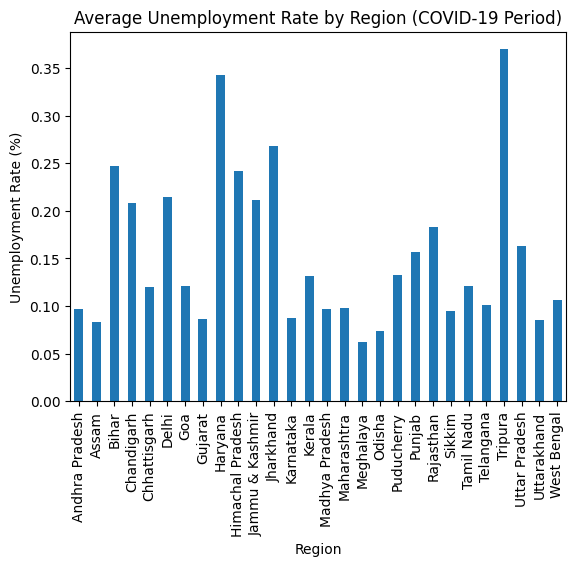

In [366]:
grouped_region=df.groupby("Region")['Est_Unemployed'].mean()
grouped_region.plot(kind='bar')
plt.ylabel('Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Region (COVID-19 Period)')

Text(0.5, 1.0, 'Estimates Employment Rate by region')

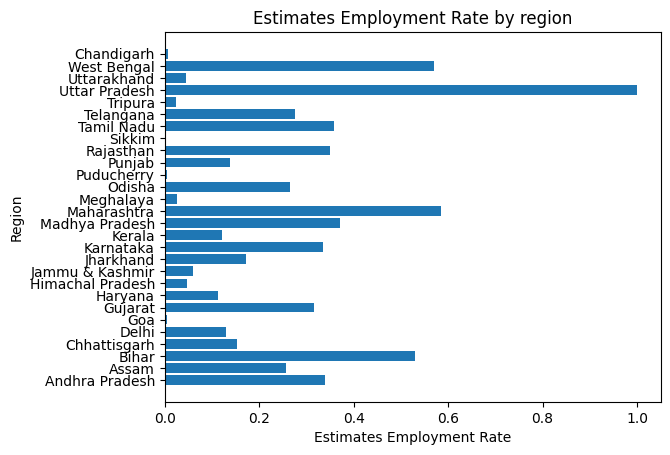

In [367]:
x=df["Region"]
y=df["Est_Employed"]
plt.barh(x,y)
plt.ylabel("Region")
plt.xlabel("Estimates Employment Rate")
plt.title('Estimates Employment Rate by region')

Text(0.5, 1.0, 'Estimated Labour Participation by Region')

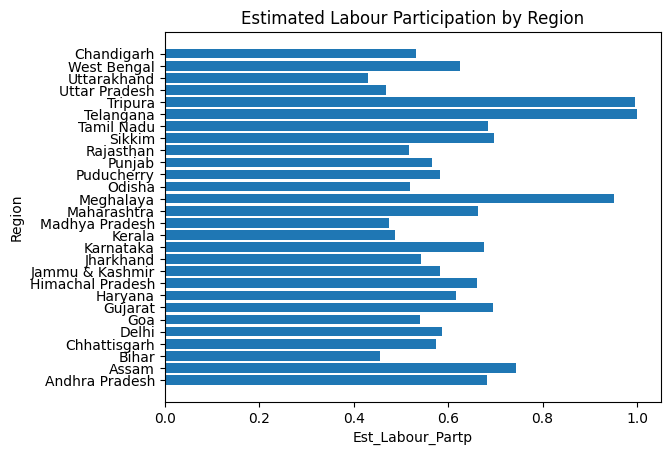

In [368]:
x=df["Region"]
y=df["Est_Labour_Partp"]
plt.barh(x,y)
plt.ylabel("Region")
plt.xlabel("Est_Labour_Partp")
plt.title('Estimated Labour Participation by Region')

Text(0.5, 1.0, 'Data distribution')

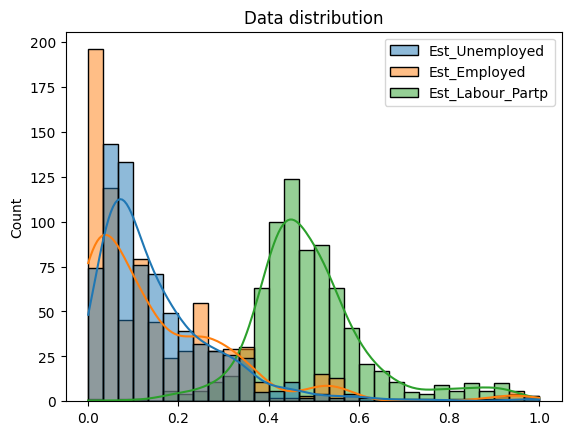

In [369]:
sns.histplot(data=df, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Data distribution')

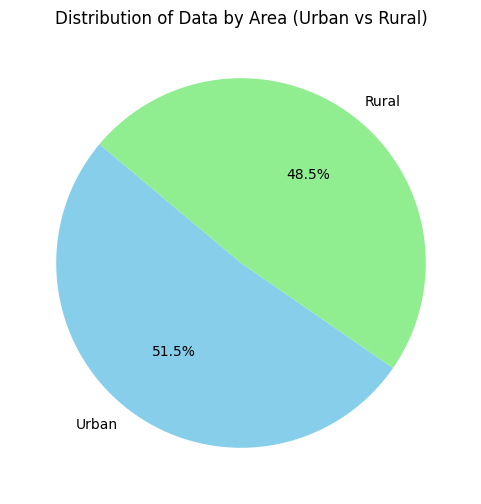

In [370]:
# Count the number of entries for each area
area_counts = df['Area'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title("Distribution of Data by Area (Urban vs Rural)")
plt.show()


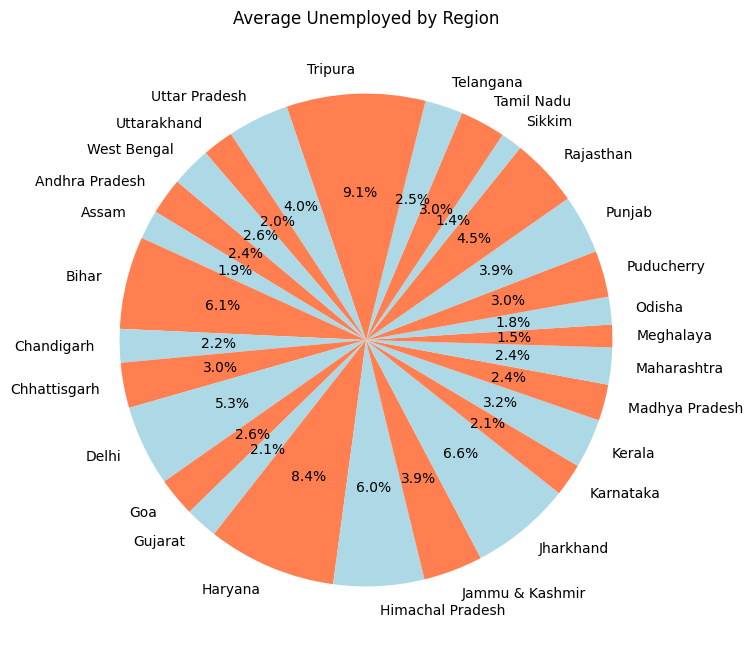

In [371]:
# Calculate the average of 'Est_Labour_Partp' by area
avg_labour_participation = df.groupby('Region')['Est_Unemployed'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_labour_participation, labels=avg_labour_participation.index, autopct='%1.1f%%', startangle=140, colors=['coral', 'lightblue'])
#plt.title("Average Labour Participation by Area (Urban vs Rural)")
plt.title("Average Unemployed by Region")
plt.show()


Text(0.5, 1.0, 'Unemployed by Date')

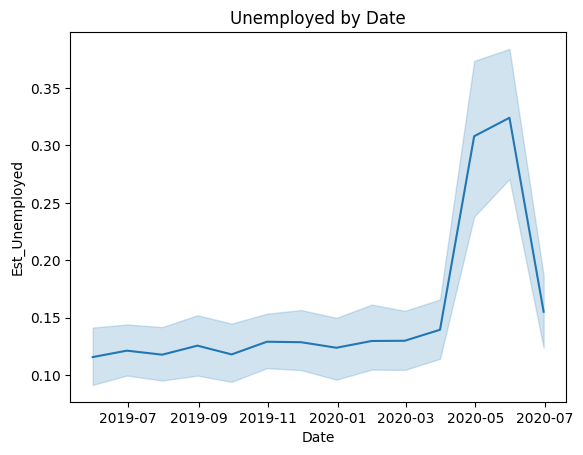

In [372]:
sns.lineplot(data=df,x="Date",y="Est_Unemployed")
plt.title("Unemployed by Date")

<AxesSubplot: xlabel='Date', ylabel='Est_Unemployed'>

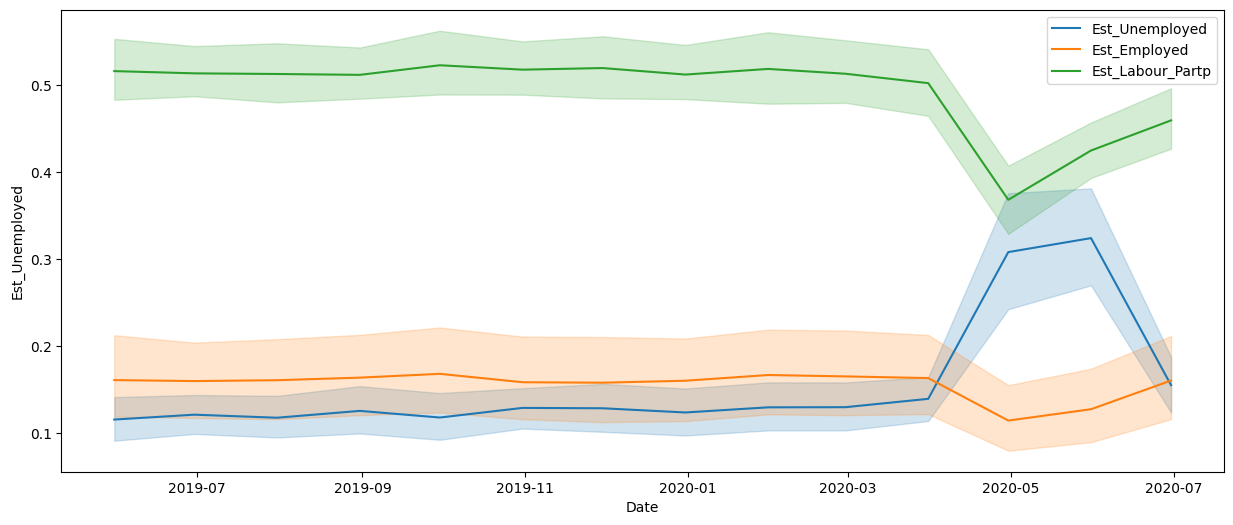

In [373]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x="Date",y="Est_Unemployed",label='Est_Unemployed')
sns.lineplot(data=df,x="Date",y="Est_Employed",label='Est_Employed')
sns.lineplot(data=df,x="Date",y="Est_Labour_Partp",label='Est_Labour_Partp')

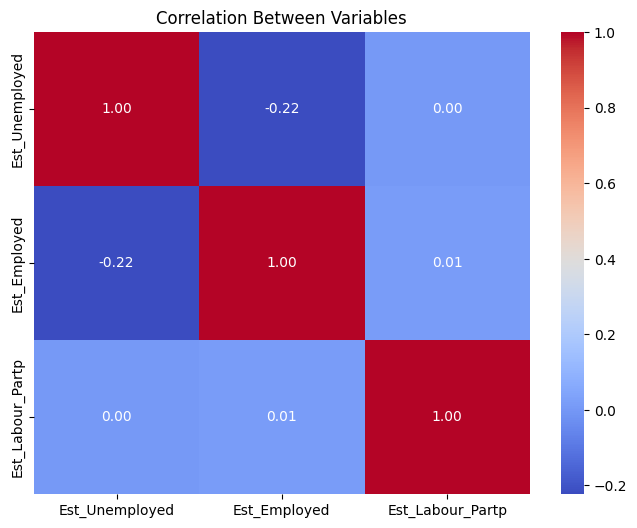

In [374]:
# Correlation heatmap
df=df.select_dtypes(include='number')
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Feature selection
X = df[['Est_Employed', 'Est_Labour_Partp']]
y = df['Est_Unemployed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
print("Model R^2 Score:", model.score(X_test, y_test))

Model R^2 Score: 0.03938840314253966
